# CNN

CNN is a deep learning model that able to extract image features within the training process.  
  
Why CNN is able to do that? It was something related to computer vision.  

### feature extraction of image
Image's features are points, edges and lines.

By walking through the image with a special mask, we can have score for each pixel which albe to 
represent this pixel is on line or edge, etc.

![SegmentLocal](images/FeatureExtraction.gif "segment")

In CNN, the mask and extraction process were inside **Convolution Layer**.  

## Get into Code, what were see in model?
  
We will have MNIST and Keras for this sample.  
  
Let's set up preprocessing and visualize methods.

In [96]:
import matplotlib.pyplot as plt
from IPython.display import Image

def show_images(images: list) -> None:
    n: int = len(images)
    f = plt.figure()
    for i in range(n):        
        f.add_subplot(1, n, i + 1)
        plt.imshow(images[i], cmap='gray')
    plt.show(block=True)
    
def show_image(image) -> None:
    plt.imshow(image, cmap='gray')
    plt.show(block=True)
    
def show_online_image(target_url):
    # Image(url= "https://gluon.mxnet.io/_images/dcgan.png")
    Image(url= target_url)
    
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig=plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25: num=25
    for i in range(0, num):
        ax=plt.subplot(5, 5, i+1)
        ax.imshow(images[idx], cmap='binary')
        title="label=" + str(labels[idx])
        if len(prediction) > 0:
            title += ",predict=" + str(prediction[idx])
        ax.set_title(title, fontsize=10)
        ax.set_xticks([]);
        ax.set_yticks([]);
        idx += 1
    plt.show()
    
def show_train_history(train_history):
    fig=plt.gcf()
    fig.set_size_inches(16, 6)
    plt.subplot(121)
    print(train_history.history.keys())
    
    if "accuracy" in train_history.history.keys():
        plt.plot(train_history.history["accuracy"])
    
    if "val_accuracy" in train_history.history.keys():
        plt.plot(train_history.history["val_accuracy"])
        
    plt.title("Train History")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(["train", "validation"], loc="upper left")
    plt.subplot(122)
    
    if "loss" in train_history.history.keys():
        plt.plot(train_history.history["loss"])
        
    if "val_loss" in train_history.history.keys():
        plt.plot(train_history.history["val_loss"])
        
    plt.title("Train History")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

def show_layers_filter(model, layer_index, channel_number, filter_number):
    # retrieve weights from the second hidden layer    
    filters, biases = model.layers[layer_index].get_weights()
    
    # normalize filter values to 0-1 so we can visualize them
    f_min, f_max = filters.min(), filters.max()
    filters = (filters - f_min) / (f_max - f_min)
    
    # plot first few filters
    n_filters, ix = filter_number, 1
    for i in range(n_filters):
        # get the filter
        f = filters[:, :, :, i]
        # plot each channel separately
        for j in range(channel_number):
            # specify subplot and turn of axis
            ax = plt.subplot(n_filters, 4, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
            plt.imshow(f[:, :, j], cmap='gray')
            ix += 1
    # show the figure
    plt.show()

Using TensorFlow backend.


2.2.4-tf


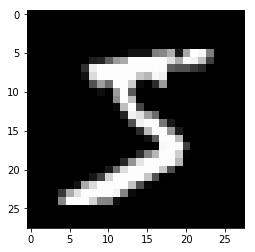

In [2]:
from tensorflow import keras
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

sample = x_train[0]

# origin image
show_image(sample)

In [3]:
# update all the training, testing dataset.
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalize them into range [0, 1]
x_train /= 255
x_test /= 255

In [4]:
from tensorflow.keras import layers

num_classes = 10

# create a Sequential model
model = keras.Sequential(
    [
        # input layer. input data with size 28*28
        # we have 32 mask and each of them were 3x3
        layers.Conv2D(32,(3,3), input_shape = (28,28,1), activation='relu'),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Conv2D(64,(3,3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
                
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        
        # output layer. the number of output should be your number of classification
        layers.Dense(num_classes, activation='softmax')
    ]
);

# print out model structure
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 36s 605us/sample - loss: 0.1527 - accuracy: 0.9524
Epoch 2/5
60000/60000 [==============================] - 35s 575us/sample - loss: 0.0461 - accuracy: 0.9855
Epoch 3/5
60000/60000 [==============================] - 35s 585us/sample - loss: 0.0335 - accuracy: 0.9897
Epoch 4/5
60000/60000 [==============================] - 32s 538us/sample - loss: 0.0257 - accuracy: 0.9919
Epoch 5/5
60000/60000 [==============================] - 33s 548us/sample - loss: 0.0199 - accuracy: 0.9939


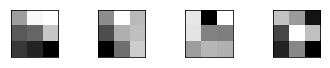

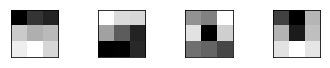

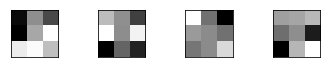

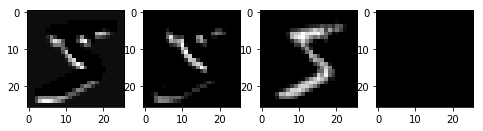

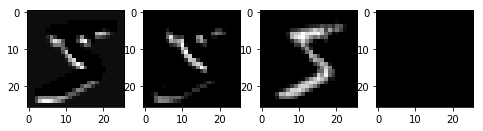

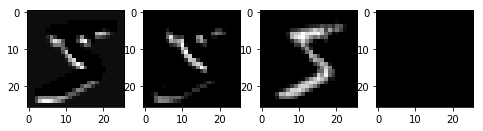

In [97]:
show_layers_filter(model, 0, 1, 4)
show_layers_filter(model, 2, 1, 4)
show_layers_filter(model, 4, 1, 4)

def show_layers_output(model, layer_index, filter_number):
    layers = model.layers[:layer_index]
    
    # Creates a model that will return these outputs, given the model input
    activate_model = keras.Sequential(layers);    
    #activate_model.summary()

    img_tensor = x_train[0]
    img_tensor = img_tensor.reshape((1,28,28,1))
    activations = activation_model.predict(img_tensor) 
    #plt.imshow(activations[0,:,:,0], cmap='gray')    
    
    fig=plt.figure(figsize=(8, 8))
    columns = 4
    rows = filter_number/4 + 1
    index = 0
    for i in range(1, filter_number +1):
        img = activations[0,:,:,index]
        fig.add_subplot(rows, columns, i)
        plt.imshow(img, cmap='gray')
        index = index+1
    plt.show()

show_layers_output(model, 0, 4)
#show_layers_output(model, 1, 4)
show_layers_output(model, 2, 4)
#show_layers_output(model, 3, 4)
show_layers_output(model, 4, 4)

In [98]:
import jovian
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Saving notebook..


<IPython.core.display.Javascript object>

[jovian] Creating a new notebook on https://jvn.io
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jvn.io/littlenine/38c1c40c64874ade98b870e30236cc1f


[jovian] Error: Failed to read Anaconda environment using command: "conda env export -n base --no-builds"
